<a href="https://colab.research.google.com/github/ZhyShe/18ma573ZhiyuanShe/blob/master/src/Volatility_smile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
!git clone https://github.com/ZhyShe/18ma573ZhiyuanShe

Cloning into '18ma573ZhiyuanShe'...
remote: Enumerating objects: 172, done.
remote: Counting objects: 100% (172/172), done.
remote: Compressing objects: 100% (169/169), done.
remote: Total 172 (delta 59), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (172/172), 231.38 KiB | 10.52 MiB/s, done.
Resolving deltas: 100% (59/59), done.


In [19]:
cd/content/18ma573ZhiyuanShe/src/

/content/18ma573ZhiyuanShe/src


In [20]:
ls hw3_py.py


hw3_py.py


In [0]:
import numpy as np
import matplotlib.pyplot as plt 
from hw3_py import GBM, Option
import scipy.optimize as so
from prettytable import PrettyTable

In [22]:
'''
Code here is used to read data in src file

'''
#------------------
## Code starts here
#------------------

Odata=np.loadtxt('optiondata2.dat', comments='#', delimiter=',')
table = PrettyTable(['otype', 'maturity', 'strike', 'option_price'])
[table.add_row(row) for row in Odata]
print(table)

+-------+---------------------+--------+--------------------+
| otype |       maturity      | strike |    option_price    |
+-------+---------------------+--------+--------------------+
|  1.0  | 0.16666666666666666 |  97.0  |  5.3270546077076   |
|  1.0  | 0.16666666666666666 |  99.0  |  3.86224255083792  |
|  1.0  | 0.16666666666666666 | 101.0  | 2.7204370993761713 |
|  1.0  | 0.16666666666666666 | 103.0  | 2.120279298119744  |
|  1.0  |  0.4166666666666667 |  97.0  | 7.237563067159547  |
|  1.0  |  0.4166666666666667 |  99.0  | 5.950534606338715  |
|  1.0  |  0.4166666666666667 | 101.0  | 5.264012203816427  |
|  1.0  |  0.4166666666666667 | 103.0  | 4.974934217069144  |
+-------+---------------------+--------+--------------------+


In [0]:
gbm = GBM(
    init_state = 100, #market data
    drift_ratio = .05, #market data
    vol_ratio = .1 #initial guess
)

def Clist(Odata):
  Olist=[]
  for row in Odata:
    otype, maturity, strike, option_price=row
    Olist.append(Option(Otype=otype, Strike=strike, Maturity=maturity, Market_Price=option_price))
  return Olist

def err_function(vol, gbm, Olist):
  gbm.vol_ratio=vol
  err=0
  for option in Olist:
    err=err+(GBM.bsm_price(gbm, option)-option.Market_Price)**2
  return err

def calibration_bsm(gbm, Olist):
  init_vol=.1
  return so.fmin(err_function, init_vol, args = (gbm, Olist), disp = 0)[0]

In [0]:
filter1 = list(filter(lambda x: x.Maturity == 2/12, Olist))
calibrated_volatility1 = calibration_bsm(gbm, filter1)

In [28]:
gbm.vol_ratio = calibrated_volatility1

#find calibrated option price
filter1_calibrated_price = [GBM.bsm_price(gbm, filter1[i]) for i in range(len(filter1))]
print('>>>>>>>>> this is option price calculated from calibrated vol')
filter1_calibrated_price

>>>>>>>>> this is option price calculated from calibrated vol


[5.184221823763238, 3.9225121216534404, 2.8709333662230563, 2.0297005112870465]

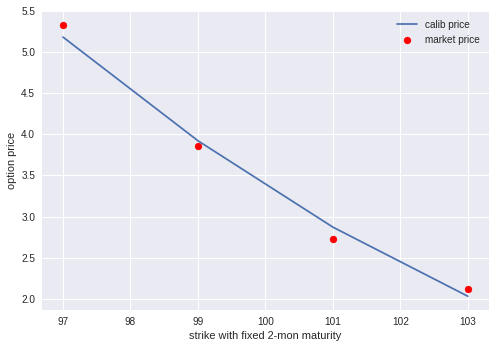

In [39]:
x_co = [filter1[i].Strike for i in range(len(filter1))]
y_co = [filter1[i].Market_Price for i in range(len(filter1))]
plt.scatter(x_co, y_co,color='r', label='market price')

y_co = filter1_calibrated_price
plt.plot(x_co, y_co, label = 'calib price')

plt.ylabel('option price')
plt.xlabel('strike with fixed 2-mon maturity')
plt.legend()
plt.show()